# Drug Review

## Used libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Upload data

In [2]:
path_train = 'data/drugsComTrain_raw.csv'
path_test = 'data/drugsComTest_raw.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
df_test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
print(f'Train set shape: {df_train.shape}')
print(f'Test set shape: {df_test.shape}')
print(f'Full set shape: {df_all.shape}')

Train set shape: (161297, 7)
Test set shape: (53766, 7)
Full set shape: (215063, 7)


## Data Preprocessing

### Remove reviews with missing values

In [6]:
df_all.isna().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

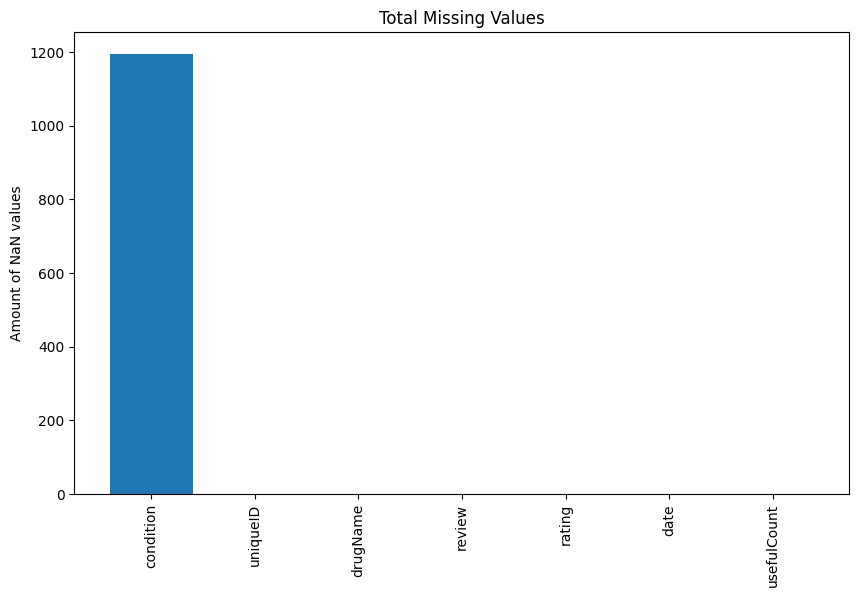

In [7]:
nan_percentage = df_all.isna().sum().sort_values(ascending=False)

#plot number of NaN values in each feature
plt.figure(figsize=(10,6))
plt.bar(nan_percentage.index, height=nan_percentage)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel('Amount of NaN values')
plt.title('Total Missing Values')
plt.show()

In [8]:
#create mask to see rows with NaN values
mask = df_all.isna()
df_na = df_all[mask.any(axis=1)]
df_na

,uniqueID,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10,18-Aug-10,1
148,61073,Urea,NaN,"""Accurate information.""",10,2-Jul-11,13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10,20-Oct-10,25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8,24-Jan-11,1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6,23-Mar-17,1
...,...,...,...,...,...,...,...
213721,170508,Quetiapine,NaN,"""good for insomnia most of the time""",7,27-May-15,10
213785,104629,Ethinyl estradiol / levonorgestrel,NaN,"""I am almost on my third month of my first pac...",5,25-Apr-11,4
213914,104642,Ethinyl estradiol / levonorgestrel,NaN,"""I have been taking this birth control for two...",10,11-Jan-11,1
214039,720,Medroxyprogesterone,NaN,"""I have been using the shot for 7 years now an...",10,21-Apr-11,1


There's no point in having those rows with no condition. Let's drop them

In [9]:
print(f'Initial number of rows in the full set: {len(df_all)}')
print(f'Initial number of rows in the train set: {len(df_train)}')
print(f'Initial number of rows in the test set: {len(df_test)}')

df_all.dropna(inplace=True)
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

print(f'Number of rows in full set after dropping NaN values: {len(df_all)}')
print(f'Number of rows in train set after dropping NaN values: {len(df_train)}')
print(f'Number of rows in test set after dropping NaN values: {len(df_test)}')

Initial number of rows in the full set: 215063
Initial number of rows in the train set: 161297
Initial number of rows in the test set: 53766
Number of rows in full set after dropping NaN values: 213869
Number of rows in train set after dropping NaN values: 160398
Number of rows in test set after dropping NaN values: 53471


In [10]:
#number of unique conditions
cond_nunique = df_all['condition'].nunique()

#number of unique drug names
drug_nunique = df_all['drugName'].nunique()

print(f'There are {drug_nunique} unique values of drugs')
print(f'There are {cond_nunique} unique values of conditions')
print(f'There are {int(drug_nunique/cond_nunique)} drugs for each condition')

There are 3667 unique values of drugs
There are 916 unique values of conditions
There are 4 drugs for each condition


### Remove reviews with '<\span>' in the condition

<function matplotlib.pyplot.show(close=None, block=None)>

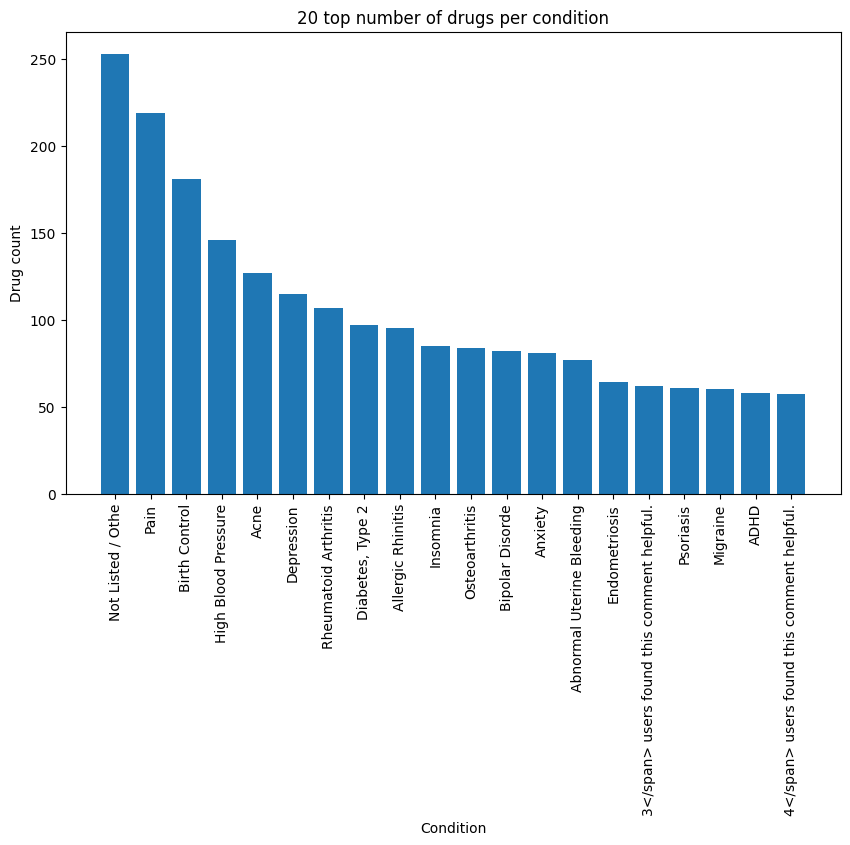

In [11]:
#drugs grouped by condition
drug_by_cond = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False).head(20)

#plot amount of drugs for each condition
plt.figure(figsize=(10,6))
plt.bar(drug_by_cond.index, drug_by_cond)
plt.xlabel('Condition')
plt.ylabel('Drug count')
plt.xticks(fontsize=10, rotation=90)
plt.title('20 top number of drugs per condition')
plt.show

In [12]:
df_all[df_all['condition'].str.contains('users.*helpful')]

,uniqueID,drugName,condition,review,rating,date,usefulCount
105,220696,Loestrin 24 Fe,2</span> users found this comment helpful.,"""I&#039;m 16 and I have been on Loestrin 24 f...",3,3-Nov-10,2
196,67383,Provera,4</span> users found this comment helpful.,"""I&#039;m 24 years old and have always had a p...",1,27-Mar-16,4
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,1-Jun-10,3
264,132965,Loestrin 24 Fe,4</span> users found this comment helpful.,"""Took this pill for 1.) Acne and 2.) Birth Con...",2,24-Jun-14,4
391,91050,Norco,11</span> users found this comment helpful.,"""I have suffered with low back pain - 2 surger...",9,15-Mar-09,11
...,...,...,...,...,...,...,...
213740,133354,Tri-Sprintec,3</span> users found this comment helpful.,"""I have been taking this pill for less than a ...",8,24-Sep-10,3
214413,149494,Mirena,5</span> users found this comment helpful.,"""I got the Mirena put in last month. And holy ...",7,12-Feb-13,5
214584,91988,Lyrica,21</span> users found this comment helpful.,"""It was a nightmare.I had the worse side effec...",1,14-Apr-15,21
214650,174757,Dulera,28</span> users found this comment helpful.,"""My 10 year old son took Dulera for asthma. I...",1,29-Feb-12,28


In [13]:
#create mask to drop rows with condition = 'users found... helpful.'
mask_all = df_all['condition'].str.contains('users.*helpful')
mask_train = df_train['condition'].str.contains('users.*helpful')
mask_test = df_test['condition'].str.contains('users.*helpful')

#apply it to train, test and full dataset
df_all = df_all[~mask_all].reset_index(drop=True)
df_train = df_train[~mask_train].reset_index(drop=True)
df_test = df_test[~mask_test].reset_index(drop=True)

### Remove reviews with only one drug per condition

In [14]:
(df_train.groupby(['condition'])['drugName'].nunique()==1).index

Index(['ADHD', 'AIDS Related Wasting', 'AV Heart Block',
       'Abdominal Distension', 'Abnormal Uterine Bleeding', 'Abortion',
       'Acetaminophen Overdose', 'Acne', 'Actinic Keratosis',
       'Acute Coronary Syndrome',
       ...
       'moterol)', 'mulation) (phenylephrine)', 't Care',
       't Pac with Cyclobenzaprine (cyclobenzaprine)',
       'tic (mycophenolic acid)', 'unctional Gastric Disorde',
       'ungal Infection Prophylaxis', 'ungal Pneumonia',
       'von Willebrand's Disease', 'zen Shoulde'],
      dtype='object', name='condition', length=811)

In [15]:
#drop rows with conditions with only one drug

#full dataset
condition_count_all = df_all.groupby(['condition'])['drugName'].nunique()
multi_drug_all = condition_count_all[condition_count_all>1].index.tolist()
df_all = df_all[df_all['condition'].isin(multi_drug_all)]

#train set
condition_count_train = df_train.groupby(['condition'])['drugName'].nunique()
multi_drug_train = condition_count_train[condition_count_train>1].index.tolist()
df_train = df_train[df_train['condition'].isin(multi_drug_train)]

#test set
condition_count_test = df_test.groupby(['condition'])['drugName'].nunique()
multi_drug_test = condition_count_test[condition_count_test>1].index.tolist()
df_test = df_test[df_test['condition'].isin(multi_drug_test)]

In [16]:
df_all.groupby('condition')['drugName'].nunique().sort_values(ascending=False).tail()

condition
Pudendal Neuralgia                         2
Dupuytren's contracture                    2
Pulmonary Embolism, First Event            2
Radionuclide Myocardial Perfusion Study    2
Keratoconjunctivitis Sicca                 2
Name: drugName, dtype: int64

In [17]:
df_all

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
212693,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
212694,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
212695,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
212696,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


### Preprocess reviews

In [18]:
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer

In [19]:
stops = set(stopwords.words('english'))

In [20]:
print(f'Inital number of stopwords: {len(stops)}')
#for emotional proposes, we should include the not words

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't",\
            "needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]

for i in not_stop:
    stops.remove(i)
      
print(f'Final number of stopwords: {len(stops)}')

Inital number of stopwords: 179
Final number of stopwords: 159


In [21]:
df_all['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [22]:
#BeautifulSoup(df_all['review'][2], 'html.parser').get_text()
re.sub('[^a-zA-Z]', ' ', BeautifulSoup(df_all['review'][2], 'html.parser').get_text())#.lower().split()

' I used to take another oral contraceptive  which had    pill cycle  and was very happy  very light periods  max   days  no other side effects  But it contained hormone gestodene  which is not available in US  so I switched to Lybrel  because the ingredients are similar  When my other pills ended  I started Lybrel immediately  on my first day of period  as the instructions said  And the period lasted for two weeks  When taking the second pack  same two weeks  And now  with third pack things got even worse  my third period lasted for two weeks and now it s the end of the third week  I still have daily brown discharge   The positive side is that I didn t have any other side effects  The idea of being period free was so tempting    Alas  '

In [23]:
#import SnowballStemmer class with the argument 'english'
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    
    #delete html
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    
    #make a whitespace
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    
    #lower letters and split
    words = letters_only.lower().split()
    
    #remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    
    #stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    #join words with whitespace
    return(' '.join(stemming_words))

In [24]:
review_to_words(df_all['review'][2])

'use take anoth oral contracept pill cycl happi light period max day no side effect contain hormon gestoden not avail us switch lybrel ingredi similar pill end start lybrel immedi first day period instruct said period last two week take second pack two week third pack thing got even wors third period last two week end third week still daili brown discharg posit side side effect idea period free tempt ala'

### N-grams

In [27]:
#classify 1-5 as negative and 6-10 as positive
df_all_1_5 = df_all[df_all['rating']<6]
df_all_6_10 = df_all[df_all['rating']>5]

In [29]:
#custom function for ngram generation

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stops]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [30]:
#custom function for horizontal bar chart

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [ ]:
#get the bar chart from rating 1 to 5

freq_dict = defaultdict(int)
for sent in df_all_1_5['review']:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
        
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
#equal to: pd.DataFrame(freq_dict.items, columns=['word','freq']).sort_values('freq', ascending=False)